In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\abc\Data Science and ML\CampusX\Project\self\project_1.csv')

In [3]:
df.sample(2)

,property_name,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,...,agePossession,description,furnish_type,rating,servant_room,study room,pooja room,store_room,others,luxury_score
2800,2 BHK Flat in Valley View Estate,flat,nul,gwal pahari,56.0,6054.0,925.01,Carpet area: 925 (85.94 sq.m.),NaN,NaN,...,Old Property,"Nearby mg road,airport and all markets.\nHouse...",0.0,"['Safety5 out of 5', 'Lifestyle4 out of 5', 'E...",0,0,0,0,0,60.0
2217,4 BHK Flat in Sector 106 Gurgaon,flat,paras dews,sector 106,210.0,8917.0,2355.05,Super Built up area 2355(218.79 sq.m.),2355.0,NaN,...,Relatively New,Most unique feater of this property is that al...,2.0,NaN,1,0,0,0,1,123.0


In [4]:
df.columns

Index(['property_name', 'property_type', 'society', 'sector', 'price_in_lacs',
       'price_per_sqft_inrs', 'area', 'areaWithType', 'super_builtup',
       'builtup', 'carpet_area', 'bedRoom', 'bathroom', 'balcony', 'address',
       'floorNum', 'facing', 'agePossession', 'description', 'furnish_type',
       'rating', 'servant_room', 'study room', 'pooja room', 'store_room',
       'others', 'luxury_score'],
      dtype='object')

In [5]:
df.drop(columns=['property_name','address','description','rating'],inplace=True)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_lacs',
       'price_per_sqft_inrs', 'area', 'areaWithType', 'super_builtup',
       'builtup', 'carpet_area', 'bedRoom', 'bathroom', 'balcony', 'floorNum',
       'facing', 'agePossession', 'furnish_type', 'servant_room', 'study room',
       'pooja room', 'store_room', 'others', 'luxury_score'],
      dtype='object')

In [7]:
df.shape

(3778, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3778 non-null   object 
 1   society              3777 non-null   object 
 2   sector               3778 non-null   object 
 3   price_in_lacs        3778 non-null   float64
 4   price_per_sqft_inrs  3778 non-null   float64
 5   area                 3778 non-null   object 
 6   areaWithType         3778 non-null   object 
 7   super_builtup        1914 non-null   float64
 8   builtup              1703 non-null   float64
 9   carpet_area          1940 non-null   float64
 10  bedRoom              3778 non-null   int64  
 11  bathroom             3778 non-null   int64  
 12  balcony              3778 non-null   object 
 13  floorNum             3759 non-null   float64
 14  facing               2683 non-null   object 
 15  agePossession        3778 non-null   o

In [9]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_lacs             0
price_per_sqft_inrs       0
area                      0
areaWithType              0
super_builtup          1864
builtup                2075
carpet_area            1838
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1095
agePossession             0
furnish_type            159
servant_room              0
study room                0
pooja room                0
store_room                0
others                    0
luxury_score            159
dtype: int64

In [10]:
df.duplicated().sum()

4

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

# property_type

<Axes: xlabel='property_type', ylabel='count'>

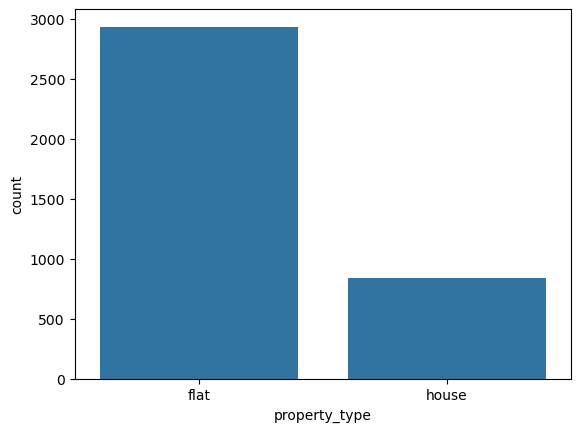

In [13]:
sns.countplot(x='property_type',data=df)

# society              

In [14]:
df['society'].value_counts()

society
independent                             479
tulip violet                             75
ss the leaf                              74
shapoorji pallonji joyville gurugram     45
dlf new town heights                     42
                                       ... 
aipl joy square                           1
radhakrishna society                      1
rwa                                       1
smartworld one dxp                        1
huda floor                                1
Name: count, Length: 671, dtype: int64

In [15]:
frequency_bins ={
    "Very high(>100)" : (df['society'].value_counts()>=100).sum(),
     "High(>50 & <100)" : ((df['society'].value_counts()>=50) & (df['society'].value_counts()<100)).sum(),
    "Average(10-49)" : ((df['society'].value_counts()>=10) & (df['society'].value_counts()<50)).sum(),
    "Low(2-9)": ((df['society'].value_counts()>=2) & (df['society'].value_counts()<10)).sum(),
    "Very Low(1)" : (df['society'].value_counts()==1).sum()
}

In [16]:
frequency_bins

{'Very high(>100)': 1,
 'High(>50 & <100)': 2,
 'Average(10-49)': 97,
 'Low(2-9)': 281,
 'Very Low(1)': 290}

In [17]:
x=df['society'][df['society']!='independent'].value_counts().head(10)

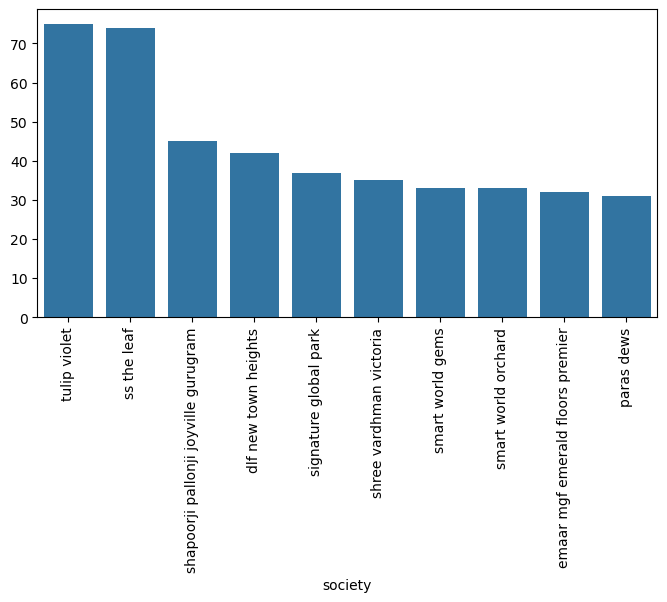

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x=x.index,y=x.values,orient='vertical')
plt.xticks(rotation=90)
plt.show()

In [19]:
df[df['society'].isnull()]

,property_type,society,sector,price_in_lacs,price_per_sqft_inrs,area,areaWithType,super_builtup,builtup,carpet_area,...,floorNum,facing,agePossession,furnish_type,servant_room,study room,pooja room,store_room,others,luxury_score
2706,flat,NaN,sector 78,60.0,3692.0,1625.14,Built Up area: 1625 (150.97 sq.m.),NaN,1625.0,NaN,...,NaN,NaN,Under Construction,0.0,0,0,0,0,0,31.0


# sector

In [20]:
x=df['sector'].value_counts().head(10)

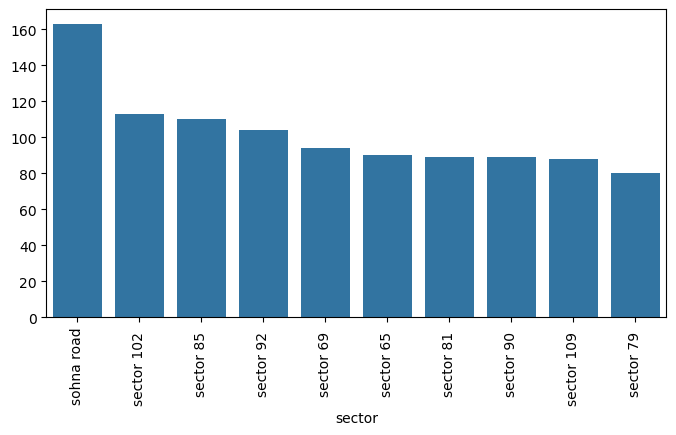

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(x=x.index,y=x.values,orient='vertical')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 24,
 'Average (10-49)': 60,
 'Low (2-9)': 53,
 'Very Low (1)': 0}

In [23]:
df['sector'].isnull().sum()

0

# price_in_lacs             

In [24]:
df['price_in_lacs'].isnull().sum()

0

In [25]:
df['price_in_lacs'].describe()

count    3774.000000
mean      250.125681
std       294.161396
min         7.500000
25%        94.000000
50%       150.000000
75%       270.000000
max      3150.000000
Name: price_in_lacs, dtype: float64

<Axes: xlabel='price_in_lacs', ylabel='Count'>

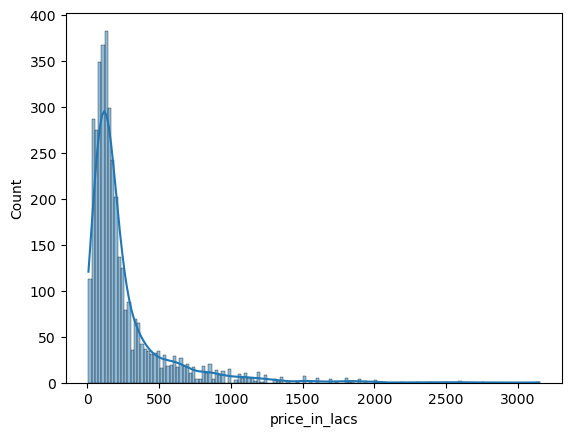

In [26]:
sns.histplot(df['price_in_lacs'],kde=True)

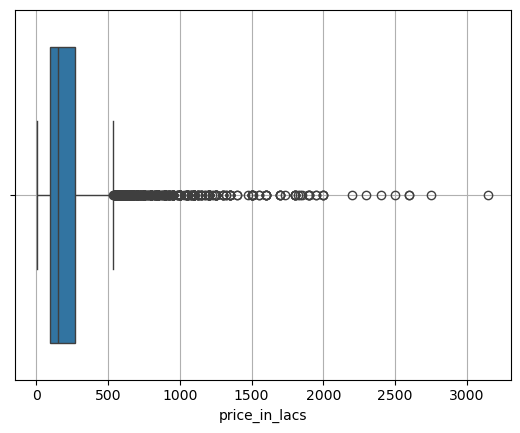

In [27]:
sns.boxplot(x=df['price_in_lacs'])
plt.grid()
plt.show()

In [28]:
df['price_in_lacs'].skew()

3.3229473104529914

In [29]:
df['price_in_lacs'].kurt()

15.420422899286917

In [30]:
df['price_in_lacs'].quantile([0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0.01      25.00
0.10      50.00
0.25      94.00
0.50     150.00
0.75     270.00
0.90     580.00
0.95     848.35
0.99    1502.70
Name: price_in_lacs, dtype: float64

In [31]:
q1=df['price_in_lacs'].quantile(0.25)
q3=df['price_in_lacs'].quantile(0.75)

In [32]:
iqr=q3-q1

In [33]:
min=q1-(1.25*q1)
max=q3+(1.25*q3)

In [34]:
min,max

(-23.5, 607.5)

In [35]:
df['price_in_lacs'][df['price_in_lacs']<607.5].count()

3428

In [36]:
3774.000000-3428

346.0

In [37]:
bins = [0, 100, 200, 300, 500, 1000, 2000, 5000]
bin_labels = ["0-100", "100-200", "200-300", "300-500", "500-1000", "1000-2000", "2000-5000"]
pd.cut(df['price_in_lacs'],bins=bins,labels=bin_labels).value_counts().sort_index()

price_in_lacs
0-100        1099
100-200      1359
200-300       488
300-500       379
500-1000      331
1000-2000     110
2000-5000       8
Name: count, dtype: int64

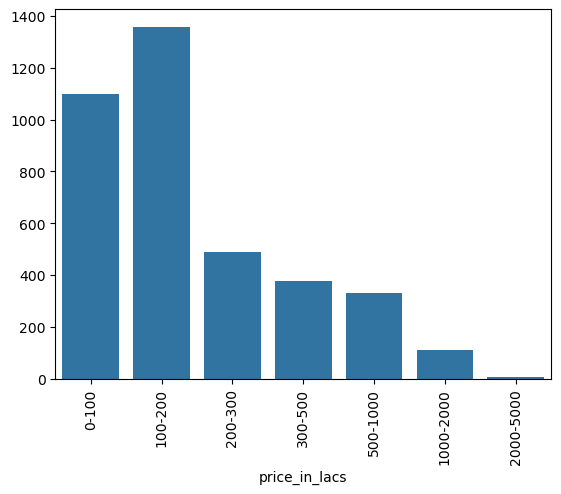

In [38]:
x=pd.cut(df['price_in_lacs'],bins=bins,labels=bin_labels).value_counts().sort_index()
sns.barplot(x=x.index,y=x.values)
plt.xticks(rotation=90)
plt.show()

In [39]:
# (df['price_in_lacs'].sort_values().cumsum())/len(df['price_in_lacs'])

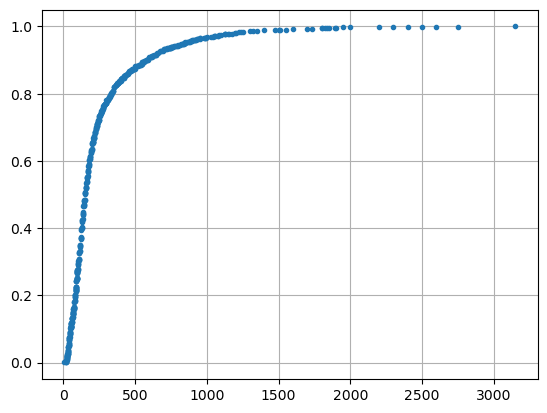

In [40]:
ecdf = df['price_in_lacs'].value_counts().sort_index().cumsum() / len(df['price_in_lacs'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

In [41]:
df['price_in_lacs'].value_counts().sort_index().cumsum()/ len(df['price_in_lacs'])

price_in_lacs
7.5       0.000265
16.0      0.000530
17.5      0.000795
19.0      0.001060
20.0      0.003180
            ...   
2400.0    0.998675
2500.0    0.998940
2600.0    0.999470
2750.0    0.999735
3150.0    1.000000
Name: count, Length: 552, dtype: float64

In [42]:
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)

In [43]:
price_trans=ft.fit_transform(df['price_in_lacs'])

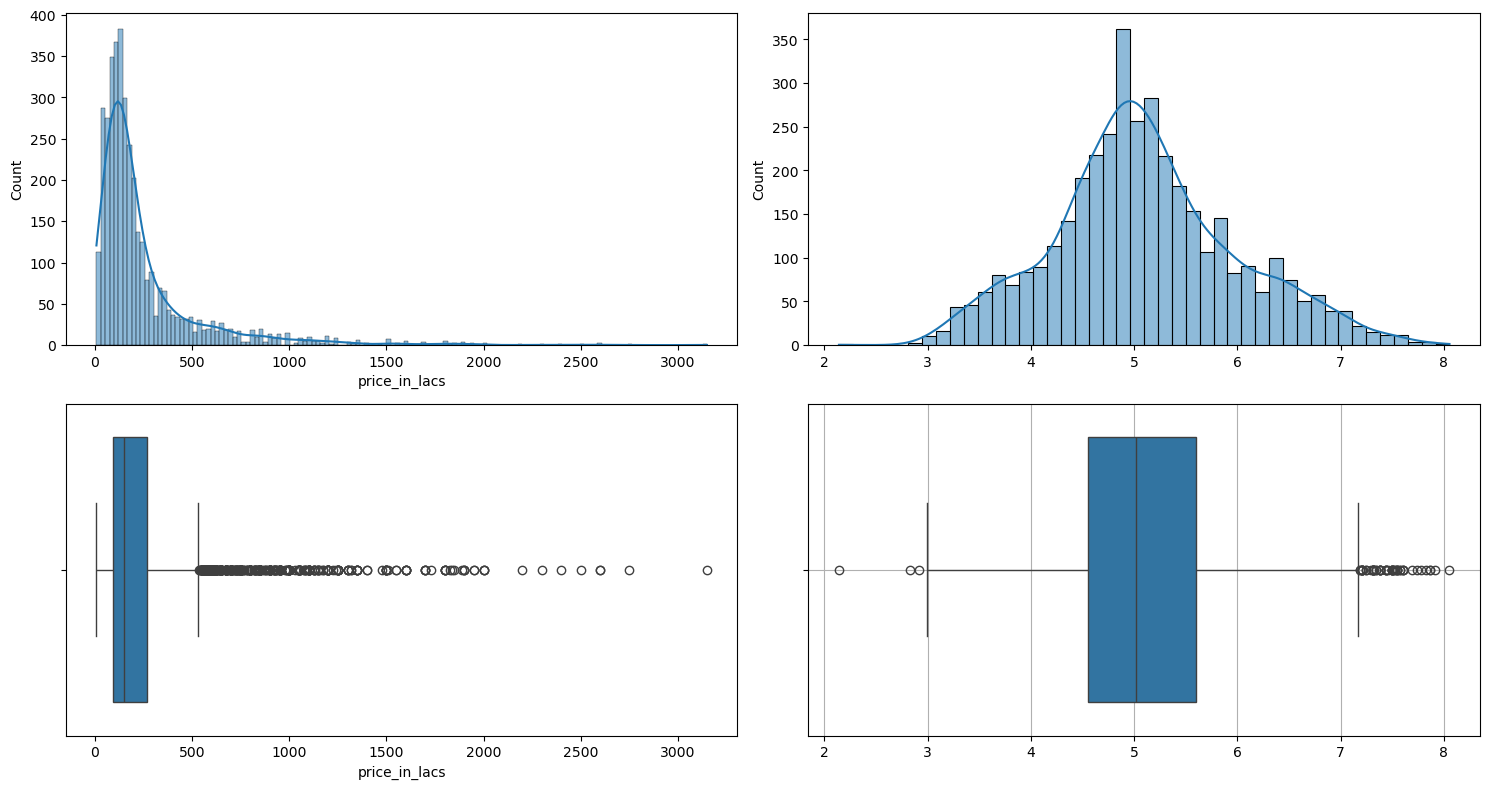

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.histplot(df['price_in_lacs'],kde=True)


plt.subplot(2,2,2)
sns.histplot(x=price_trans.values,kde=True)

plt.subplot(2,2,3)
sns.boxplot(x=df['price_in_lacs'])

plt.subplot(2,2,4)
sns.boxplot(x=price_trans.values)

plt.grid()
plt.tight_layout()
plt.show()

In [45]:
price_trans.skew(),price_trans.kurt()

(0.2963404186549813, 0.05548181601567137)

# price_per_sqft

In [46]:
df['price_per_sqft_inrs'].describe()

count      3774.000000
mean      13711.495760
std       22682.341036
min           4.000000
25%        6806.500000
50%        9000.000000
75%       13763.250000
max      600000.000000
Name: price_per_sqft_inrs, dtype: float64

<Axes: xlabel='price_per_sqft_inrs', ylabel='Count'>

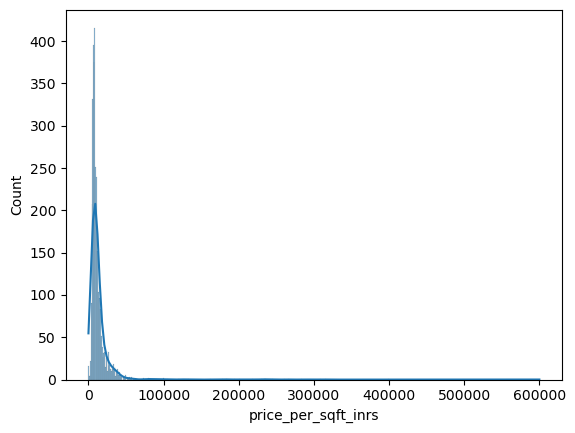

In [47]:
sns.histplot(df['price_per_sqft_inrs'],kde=True)

<Axes: xlabel='price_per_sqft_inrs'>

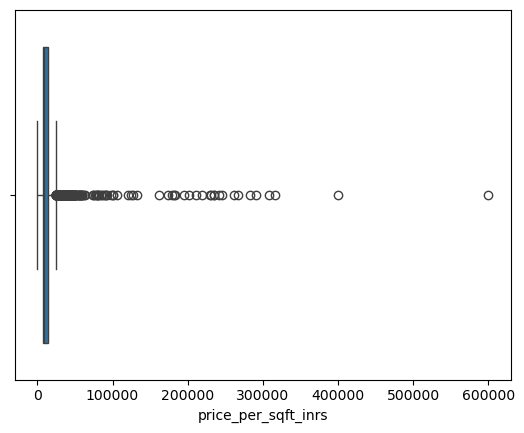

In [48]:
sns.boxplot(x=df['price_per_sqft_inrs'])

# bedRoom

In [49]:
df['bedRoom'].value_counts()

bedRoom
3     1544
2      987
4      672
5      201
1      129
6       73
9       40
8       30
7       28
12      27
10      20
16      11
13       4
19       2
18       2
14       1
20       1
21       1
11       1
Name: count, dtype: int64

In [53]:
x=df['bedRoom'].value_counts().sort_index()
x

bedRoom
1      129
2      987
3     1544
4      672
5      201
6       73
7       28
8       30
9       40
10      20
11       1
12      27
13       4
14       1
16      11
18       2
19       2
20       1
21       1
Name: count, dtype: int64

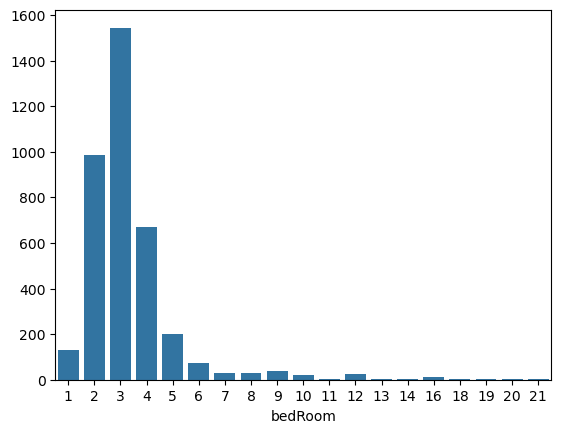

In [55]:
sns.barplot(x=x.index,y=x.values)
plt.show()

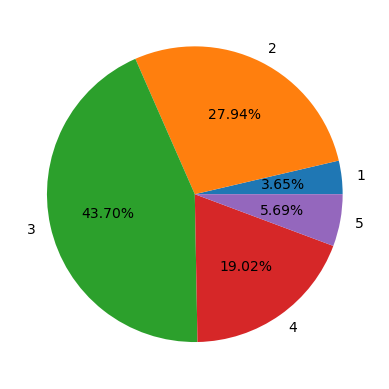

In [65]:
plt.pie(x.values[:5],autopct='%0.2f%%',normalize=True,labels=x.index[:5],)
plt.show()

In [62]:
x.values[:8]

array([ 129,  987, 1544,  672,  201,   73,   28,   30], dtype=int64)

# bathroom

In [69]:
df['bathroom'].value_counts().sort_index()

bathroom
1      158
2     1099
3     1110
4      835
5      292
6      120
7       38
8       24
9       40
10       9
11       4
12      21
13       4
14       2
16       7
17       3
18       4
20       3
21       1
Name: count, dtype: int64

x=df['bathroom'].value_counts().sort_index()
sns.barplot(x=x.index,y=x.values)
plt.show()

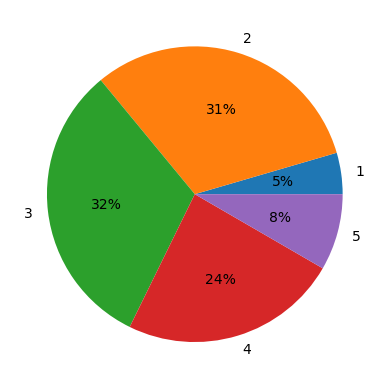

In [76]:
plt.pie(x.values[:5],autopct='%.0f%%',labels=x.index[:5])
plt.show()

# balcony

In [97]:
df['balcony'].value_counts()

balcony
3      959
3+     852
2      733
3+     337
1      296
0      187
2      186
3      146
1       78
Name: count, dtype: int64

In [120]:
def clean_balcony(row):
    return row.strip()

In [126]:
df['balcony']=df['balcony'].apply(clean_balcony)

In [128]:
df['balcony'].value_counts()

balcony
3+    1189
3     1105
2      919
1      374
0      187
Name: count, dtype: int64

<Axes: xlabel='balcony'>

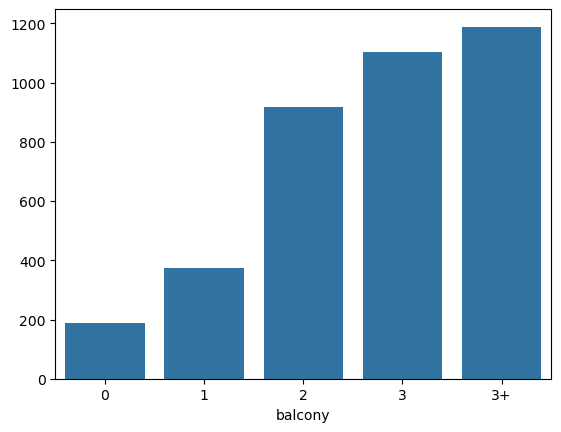

In [130]:
x=df['balcony'].value_counts().sort_index()
sns.barplot(x=x.index,y=x.values)

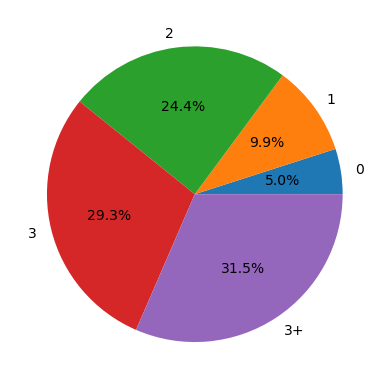

In [131]:
plt.pie(x.values,autopct='%0.1f%%',labels=x.index)
plt.show()

# floorNum

In [134]:
df['floorNum'].value_counts().sort_index()

floorNum
0.0     131
1.0     361
2.0     500
3.0     505
4.0     323
5.0     177
6.0     186
7.0     182
8.0     197
9.0     170
10.0    186
11.0    115
12.0    161
13.0     44
14.0    120
15.0     83
16.0     53
17.0     50
18.0     37
19.0     34
20.0     26
21.0     16
22.0     14
23.0     15
24.0     11
25.0      9
26.0      5
27.0      8
28.0      4
29.0      3
30.0      5
31.0      4
32.0      2
33.0      4
34.0      2
35.0      2
38.0      1
39.0      2
40.0      2
43.0      2
44.0      1
45.0      1
51.0      1
Name: count, dtype: int64

In [135]:
df['floorNum'].isnull().sum()

19

In [137]:
df['floorNum'].describe()

count    3755.000000
mean        6.840479
std         6.037784
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

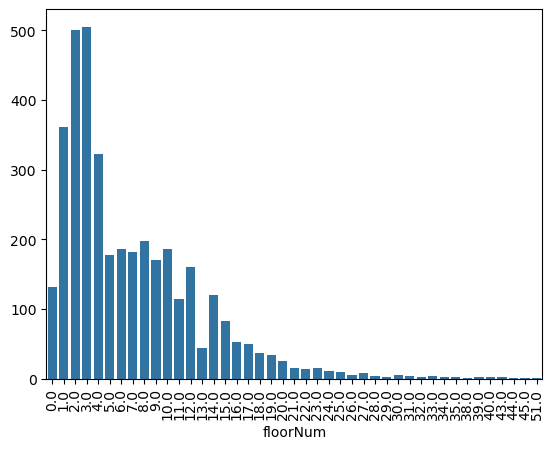

In [142]:
x=df['floorNum'].value_counts().sort_index()
sns.barplot(x=x.index,y=x.values)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='floorNum'>

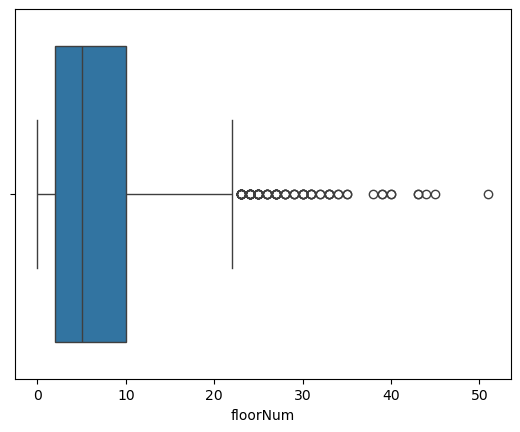

In [145]:
sns.boxplot(x=df['floorNum'])

# facing

In [147]:
df['facing'].value_counts()

facing
North-East    637
East          636
North         397
West          252
South         233
North-West    199
South-East    172
South-West    156
Name: count, dtype: int64

In [151]:
df['facing'][df['facing'].isnull()]='NA'

C:\Users\abc\AppData\Local\Temp\ipykernel_11636\2679868817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facing'][df['facing'].isnull()]='NA'


In [153]:
df['facing'].value_counts()

facing
NA            1092
North-East     637
East           636
North          397
West           252
South          233
North-West     199
South-East     172
South-West     156
Name: count, dtype: int64

In [154]:
df['facing'].isnull().sum()

0

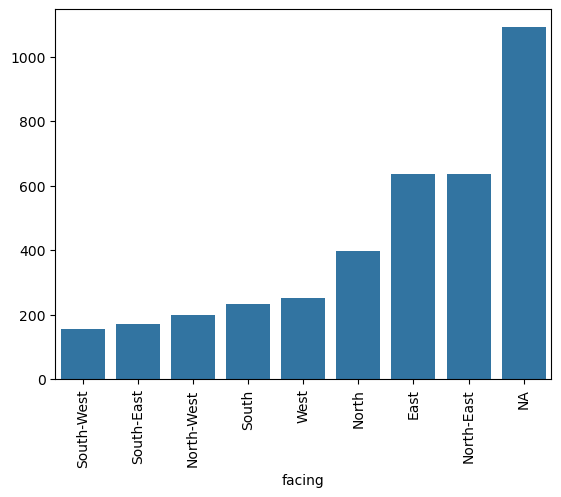

In [156]:
x=df['facing'].value_counts().sort_values()
sns.barplot(x=x.index,y=x.values)
plt.xticks(rotation=90)
plt.show()

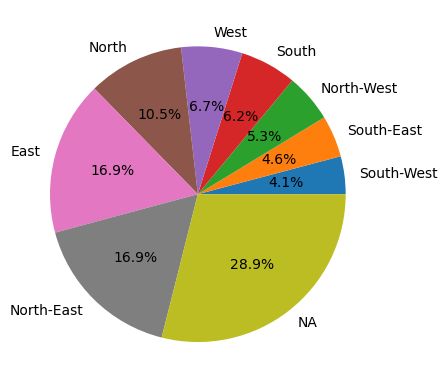

In [157]:
plt.pie(x.values,autopct='%0.1f%%',labels=x.index)
plt.show()

# agePossession

In [159]:
df.columns

Index(['property_type', 'society', 'sector', 'price_in_lacs',
       'price_per_sqft_inrs', 'area', 'areaWithType', 'super_builtup',
       'builtup', 'carpet_area', 'bedRoom', 'bathroom', 'balcony', 'floorNum',
       'facing', 'agePossession', 'furnish_type', 'servant_room', 'study room',
       'pooja room', 'store_room', 'others', 'luxury_score'],
      dtype='object')

In [162]:
df['agePossession'].value_counts()

agePossession
Relatively New        1668
New Property           622
Moderately Old         569
Undefined              327
Old Property           307
Under Construction     281
Name: count, dtype: int64

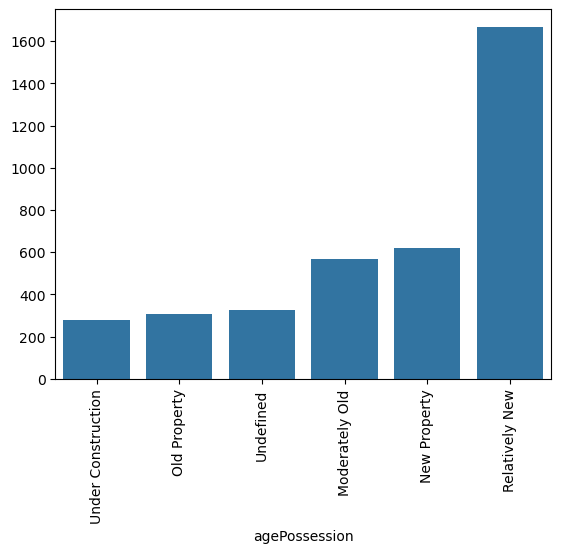

In [163]:
x=df['agePossession'].value_counts().sort_values()
sns.barplot(x=x.index,y=x.values)
plt.xticks(rotation=90)
plt.show()

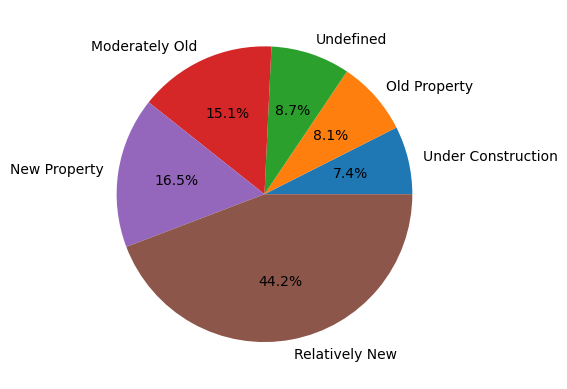

In [164]:
plt.pie(x.values,autopct='%0.1f%%',labels=x.index)
plt.show()

# super_builtup

In [169]:
df['super_builtup'].isnull().sum()

1861

In [171]:
df['super_builtup'].describe()

count     1913.000000
mean      1921.843701
std        767.243618
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_builtup, dtype: float64

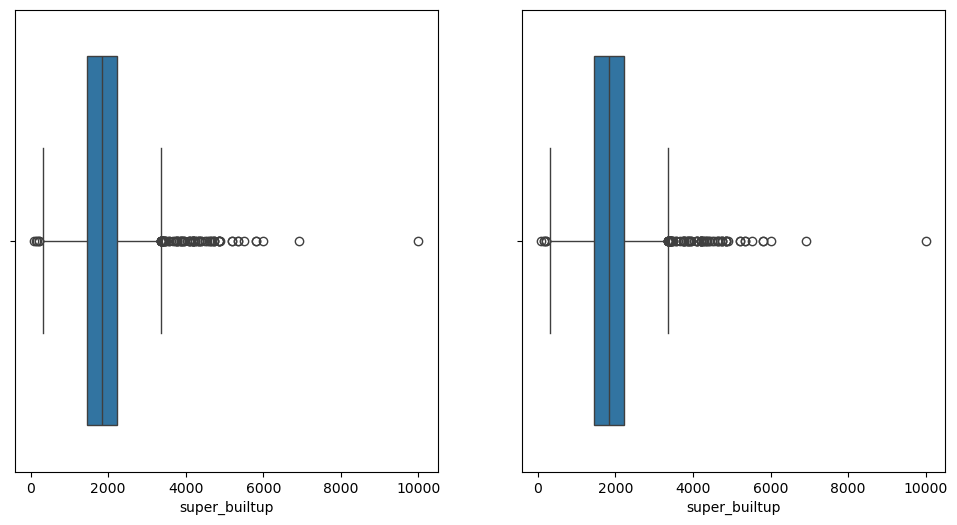

In [181]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['super_builtup'])

plt.subplot(1,2,2)
sns.boxplot(x=df['super_builtup'].dropna())
plt.show()

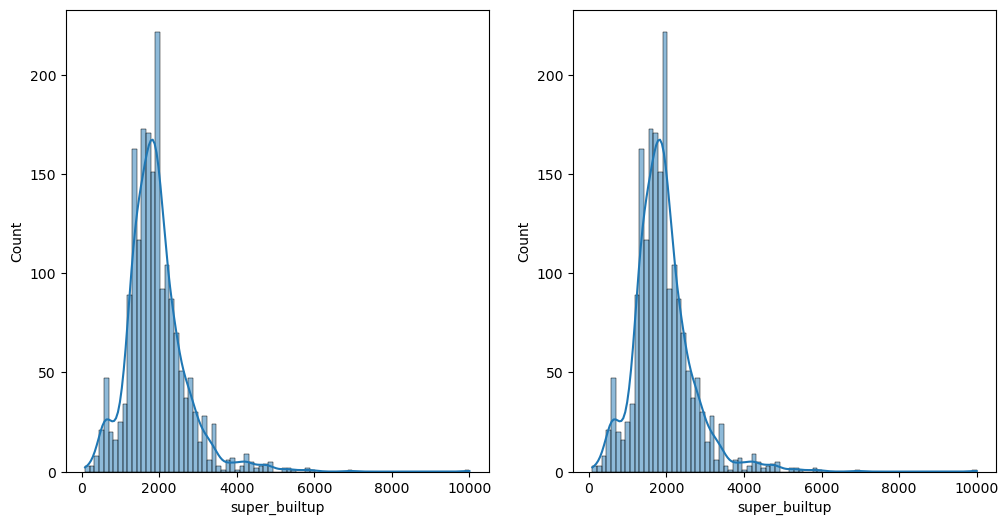

In [180]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['super_builtup'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['super_builtup'].dropna(),kde=True)
plt.show()

# carpet_area

In [184]:
df['carpet_area'].isnull().sum()

1836

In [185]:
df['carpet_area'].describe()

count      1938.000000
mean       2487.072755
std       22409.599936
min          15.000000
25%         830.000000
50%        1296.000000
75%        1788.750000
max      607936.000000
Name: carpet_area, dtype: float64

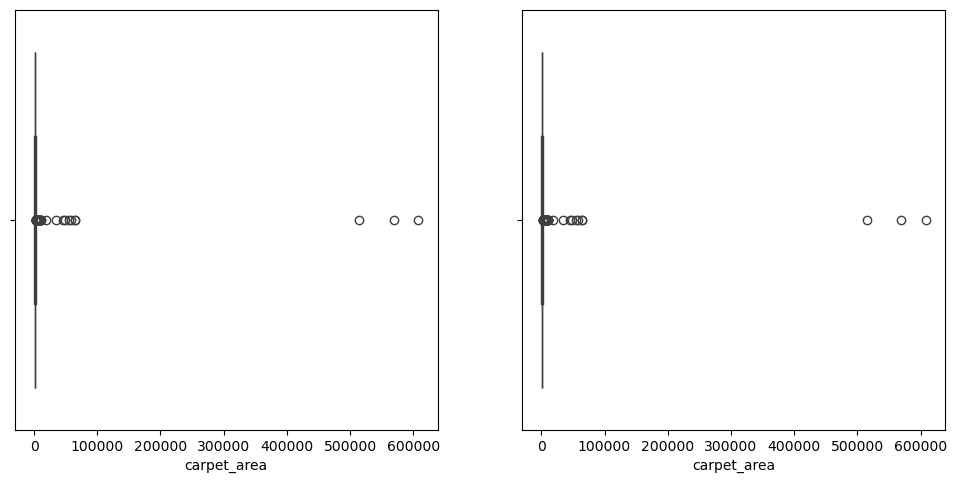

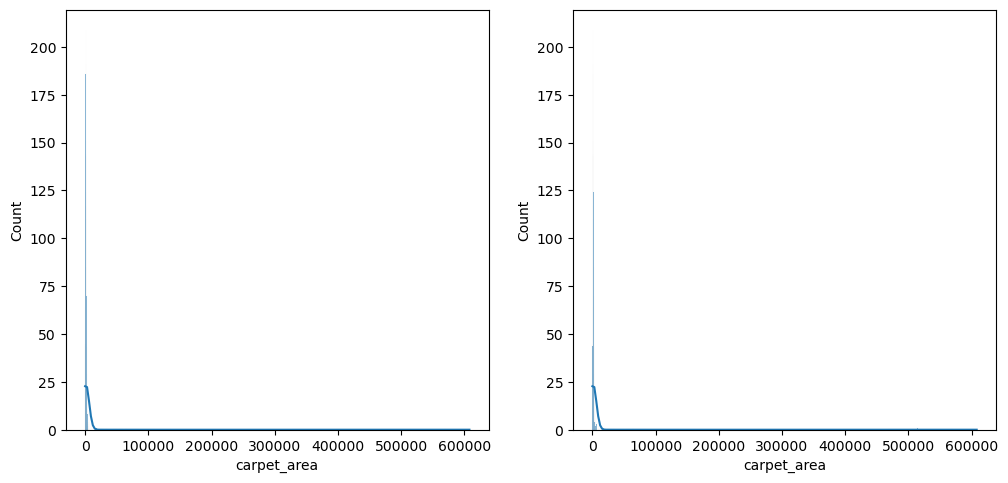

In [188]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['carpet_area'])

plt.subplot(2,2,2)
sns.boxplot(x=df['carpet_area'].dropna())
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2,2,3)
sns.histplot(df['carpet_area'],kde=True)

plt.subplot(2,2,4)
sns.histplot(df['carpet_area'].dropna(),kde=True)
plt.show()

# builtup

In [193]:
df['builtup'].describe()

count      1702.000000
mean       1847.431845
std       17880.548833
min           2.000000
25%         368.250000
50%        1297.500000
75%        1900.000000
max      737147.000000
Name: builtup, dtype: float64

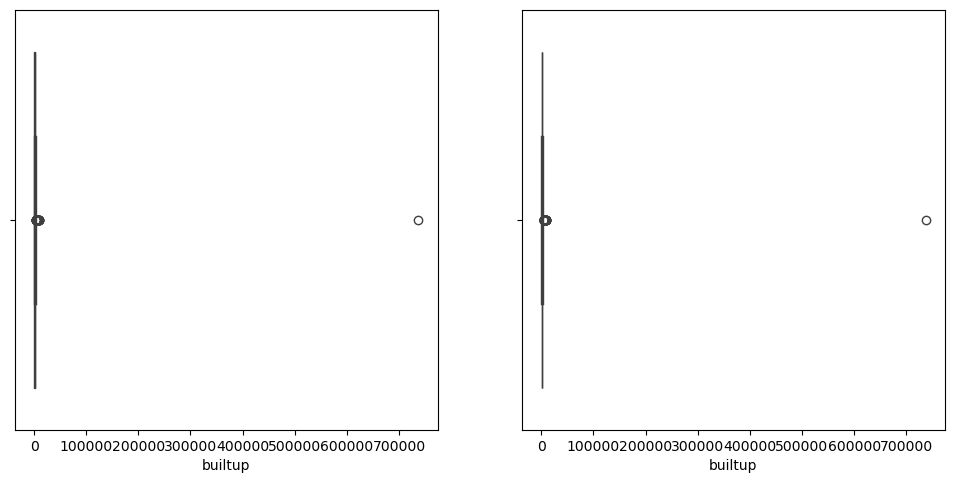

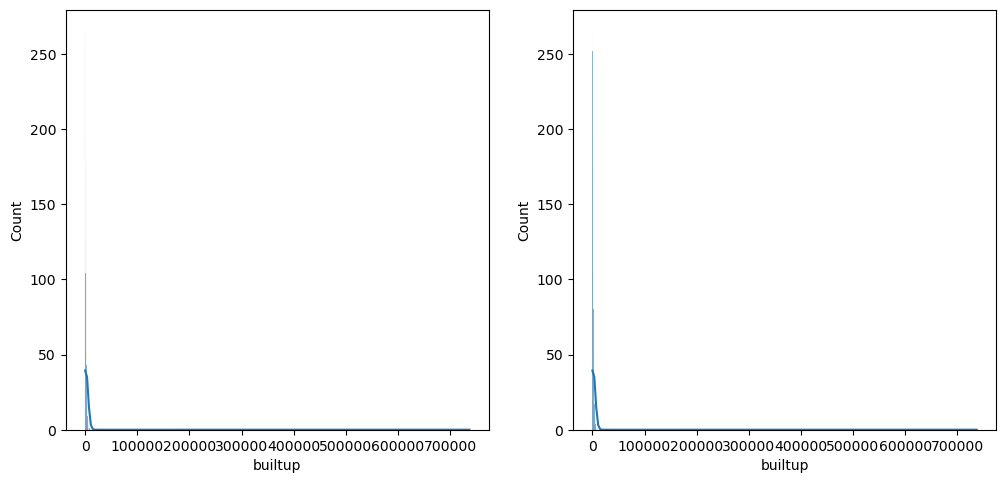

In [194]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(x=df['builtup'])

plt.subplot(2,2,2)
sns.boxplot(x=df['builtup'].dropna())
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(2,2,3)
sns.histplot(df['builtup'],kde=True)

plt.subplot(2,2,4)
sns.histplot(df['builtup'].dropna(),kde=True)
plt.show()

# addittionalRooms

In [202]:
x=df[['servant_room','study room','pooja room','store_room','others']]

In [205]:
x.describe()

,servant_room,study room,pooja room,store_room,others
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000
mean,0.356651,0.188394,0.173821,0.090090,0.110758
std,0.479074,0.391079,0.379006,0.286349,0.313874
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


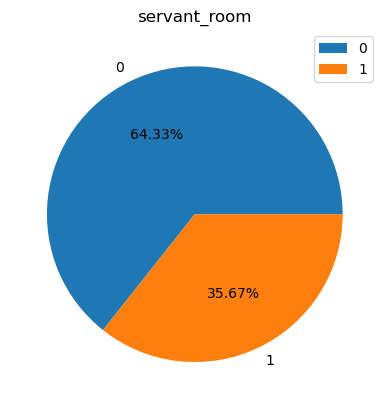

In [213]:
plt.pie(df['servant_room'].value_counts(),autopct='%0.2f%%',labels=df['servant_room'].value_counts().index)
plt.title('servant_room')
#plt.legend()
plt.show()

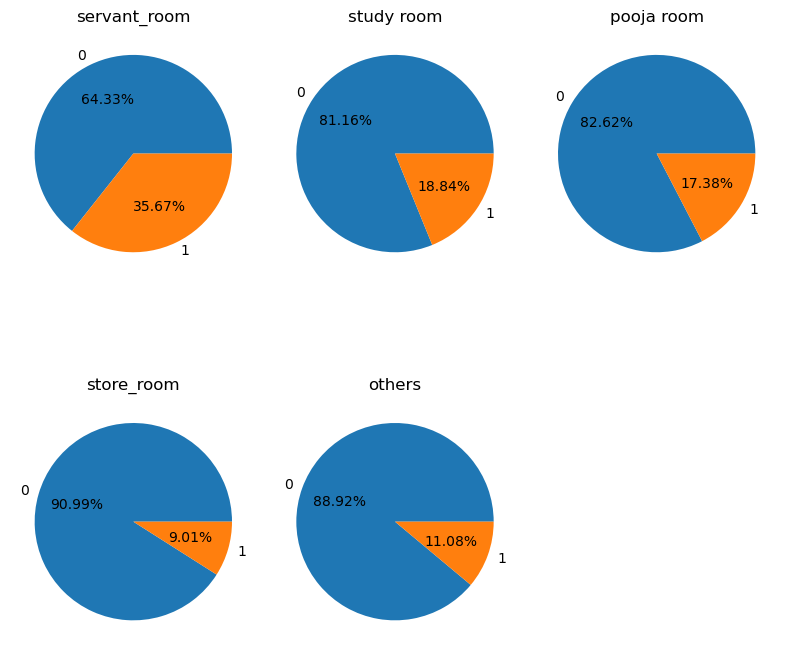

In [226]:
plt.figure(figsize=(8,8))
for i,j in enumerate(x.columns,start=1):
    plt.subplot(2,3,i)
    plt.pie(df[j].value_counts(),autopct='%0.2f%%',labels=df[j].value_counts().index)
    plt.title(j)
    #plt.legend()
plt.tight_layout()
plt.show()

# furnish_type

In [229]:
df['furnish_type'].value_counts()

furnish_type
0.0    2363
2.0    1038
1.0     214
Name: count, dtype: int64

In [238]:
labels={
    0.0 : 'Unfurnished',
    1.0 : 'Semi-Furnished',
    2.0 : 'Fully Furnished'
}

In [239]:
labels.keys()

dict_keys([0.0, 1.0, 2.0])

In [240]:
labels.values()

dict_values(['Unfurnished', 'Semi-Furnished', 'Fully Furnished'])

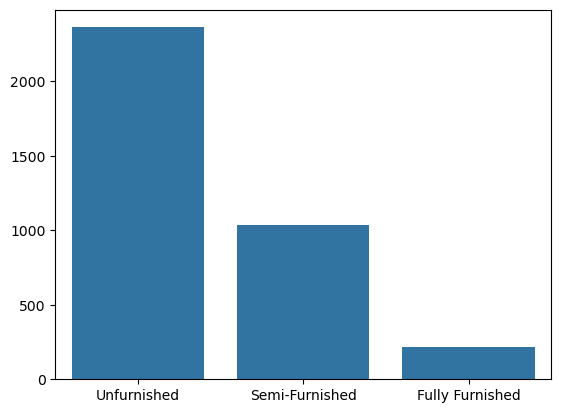

In [242]:
x=df['furnish_type'].value_counts()
sns.barplot(x=labels.values(),y=x.values)
plt.show()

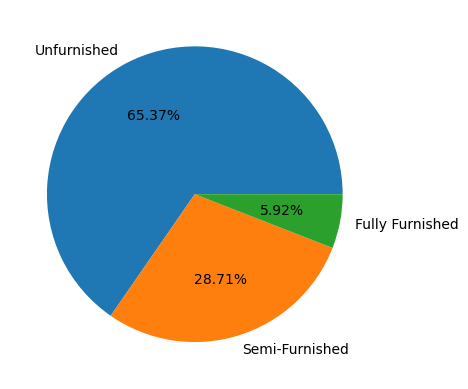

In [245]:
plt.pie(x.values,autopct='%0.2f%%',labels=labels.values())
plt.show()

# luxury_score

In [249]:
df['luxury_score'].isnull().sum()

159

In [252]:
df['luxury_score'].describe()

count    3615.000000
mean       72.333610
std        52.786137
min         0.000000
25%        35.000000
50%        60.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

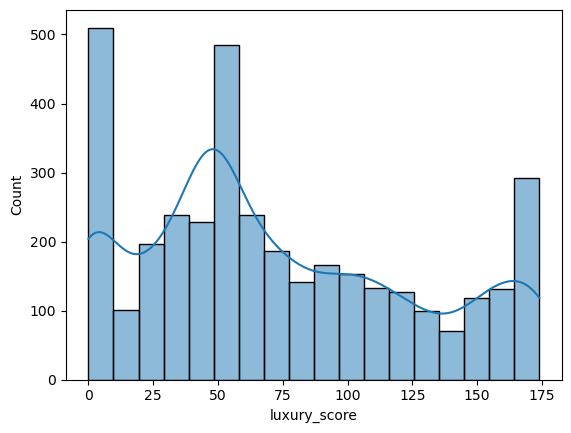

In [254]:
sns.histplot(df['luxury_score'],kde=True)
plt.show()

<Axes: xlabel='luxury_score'>

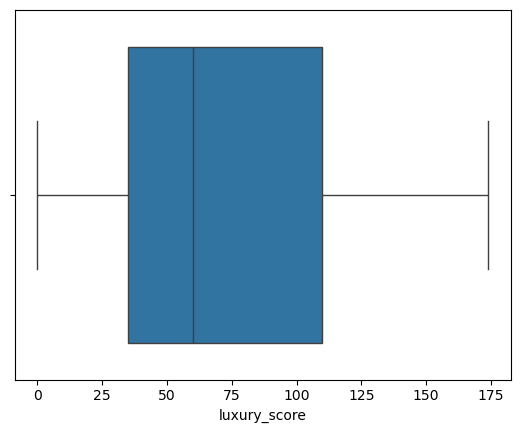

In [257]:
sns.boxplot(x=df['luxury_score'])

In [261]:
df.to_csv(r'C:\Users\abc\Data Science and ML\CampusX\Project\self\project_2.csv',index=False)